In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/House_pricing/train_validate.csv')

**Basic information about dataframe**

In [ ]:
def basic_info(df):
  print("-----Basic Information about dataframe-----")
  print("_"*80)
  print('Rows and columns:\n', df.shape)
  print("_"*80)

  print('Type of data and non-null value count:\n', df.info())
  print("_"*80)

  print('Null values count:\n', df.isnull().sum())
  print("_"*80)

  print("Numerical descriptions of dataframe: \n", df.describe())
  print("_"*80)

  print('Data Type:', df.dtypes)



In [ ]:
basic_info(df)

-----Basic Information about dataframe-----
________________________________________________________________________________
Rows and columns:
 (738527, 12)
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738527 entries, 0 to 738526
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        738527 non-null  object 
 1   price         738468 non-null  float64
 2   bed           633206 non-null  float64
 3   bath          646411 non-null  float64
 4   acre_lot      519848 non-null  float64
 5   full_address  738527 non-null  object 
 6   street        736829 non-null  object 
 7   city          738471 non-null  object 
 8   state         738527 non-null  object 
 9   zip_code      738369 non-null  float64
 10  house_size    500069 non-null  float64
 11  sold_date     365243 non-null  object 
dtypes: float64(6), object(6)
memor

**Data-Visualization**

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

Visualize missing values

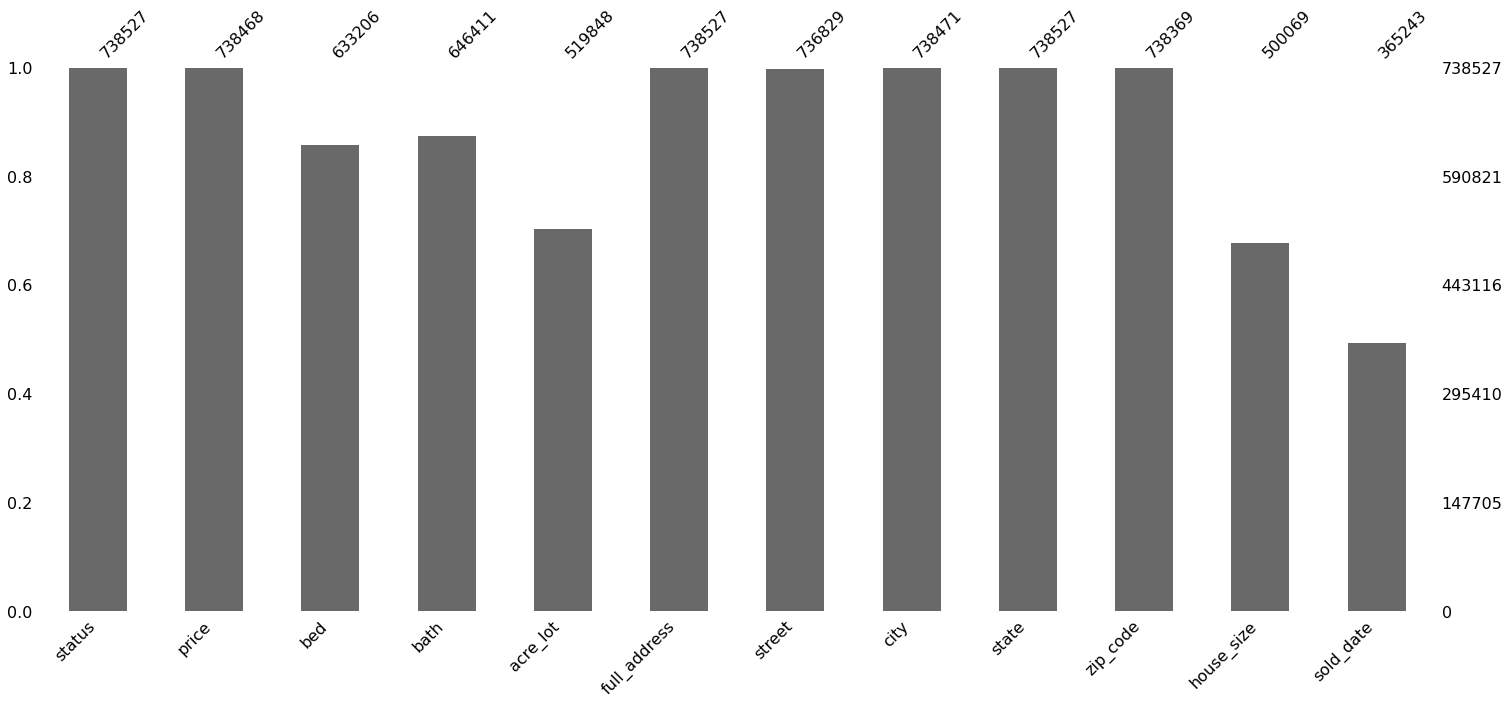

In [ ]:
msno.bar(df)
plt.show() # visualize enteries in respective of columns

In [ ]:
# checking the % of null values in respective columns
df.isnull().sum()/len(df)

   

status          0.000000
price           0.000080
bed             0.142610
bath            0.124729
acre_lot        0.296102
full_address    0.000000
street          0.002299
city            0.000076
state           0.000000
zip_code        0.000214
house_size      0.322883
sold_date       0.505444
dtype: float64

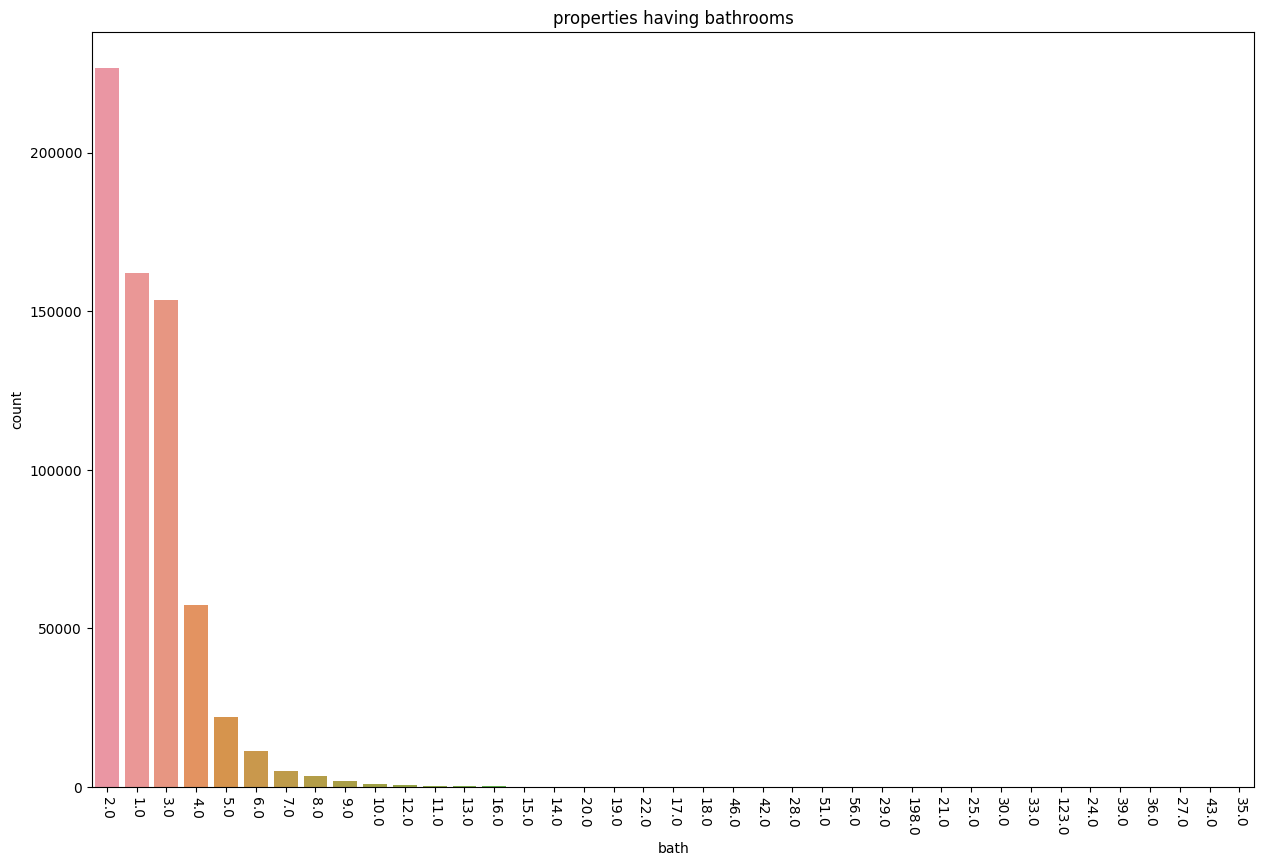

In [ ]:
df['bath'].value_counts()
plt.figure(figsize=(15,10), dpi = 100)
ax = sns.countplot(x="bath",data=df,
              order = df["bath"].value_counts().index)
plt.title("properties having bathrooms")
plt.xticks(rotation=270)
plt.savefig('bathrooms_hist.png')
plt.show()

2 and 3 bathroom's house is very common in USA.

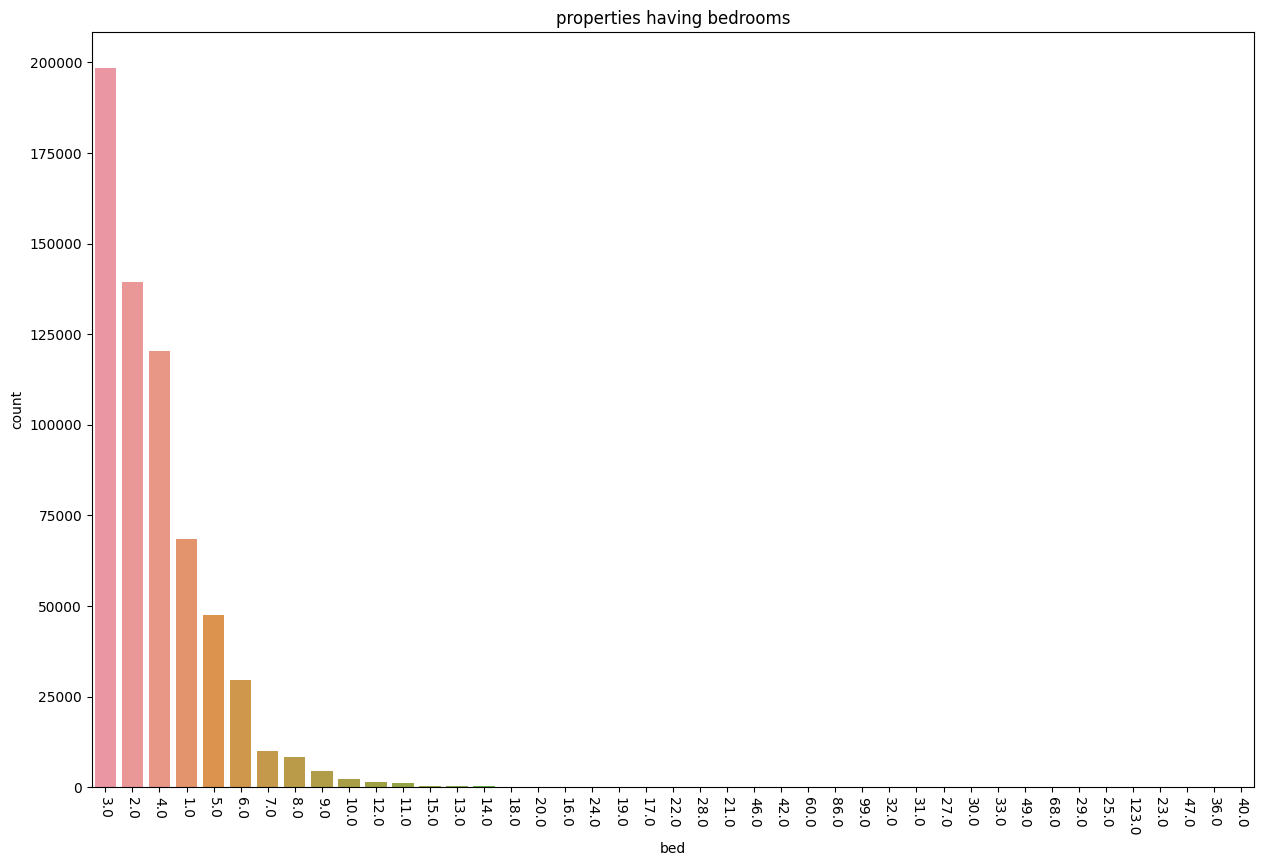

In [ ]:
df['bed'].value_counts()
plt.figure(figsize=(15,10), dpi = 100)
ax = sns.countplot(x="bed",data=df,
              order = df["bed"].value_counts().index)
plt.title("properties having bedrooms")
plt.xticks(rotation=270)
plt.savefig('bedrooms_hist.png')
plt.show()

3 and 4 bedrooms house is very common, which infer that large population of usa lives in nuclear famliy. 

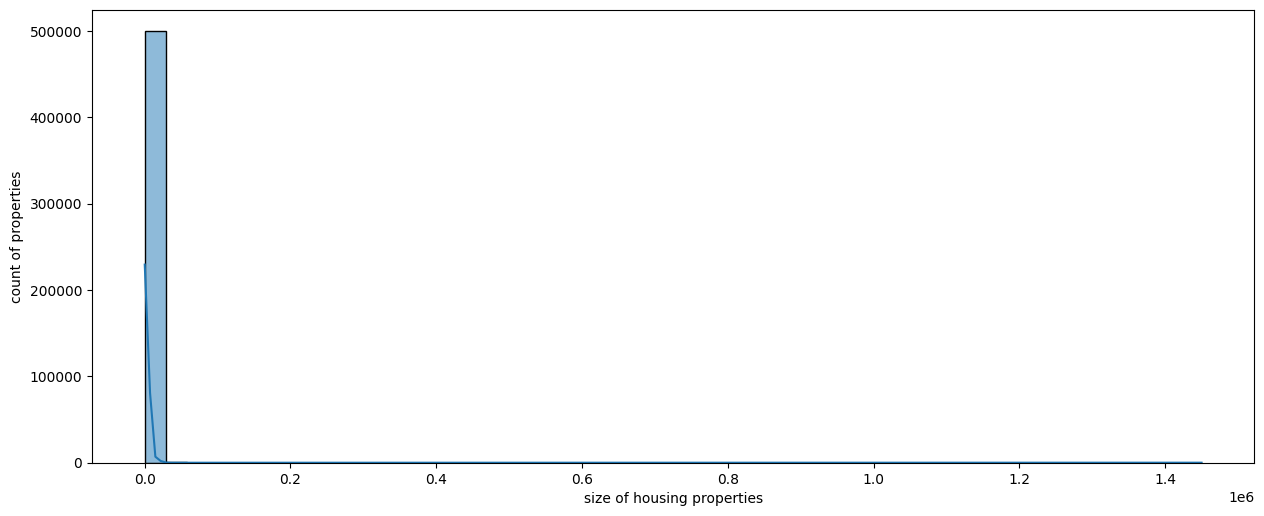

Skewness of size of properties in yards: 213.66998634929624


In [ ]:
plt.figure(figsize=(15,6), dpi = 100)
sns.histplot(data=df['house_size'], kde = True, bins = 50)
plt.savefig('house_size_yards.png')
plt.ylabel('count of properties')
plt.xlabel('size of housing properties')
plt.show()
print('Skewness of size of properties in yards:', df['house_size'].skew())

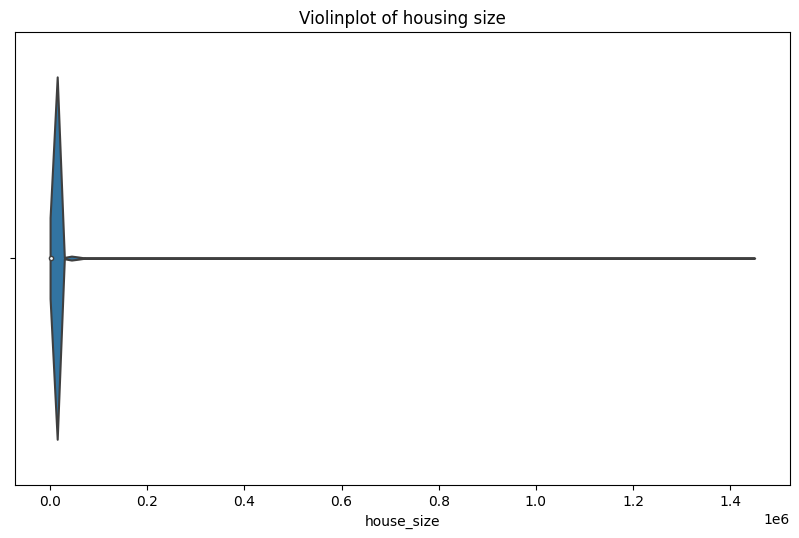

In [ ]:
plt.figure(figsize=(10,6), dpi = 100)
sns.violinplot(x='house_size',data=df)
plt.title("Violinplot of housing size")
plt.savefig("Violinplon_acre_lot.png")
plt.show()

In [ ]:
df['zip_code'].value_counts()
# Zip_code and (state, city and street) provides same info hence we can drop zip_code column

10022.0    4580
10011.0    4226
10023.0    3961
11201.0    3755
10021.0    3636
           ... 
19374.0       1
12919.0       1
4056.0        1
4492.0        1
18920.0       1
Name: zip_code, Length: 3179, dtype: int64

In [ ]:
columns_to_dropped = ['zip_code']

Skewness of size of properties in acre: 92.91662541161277


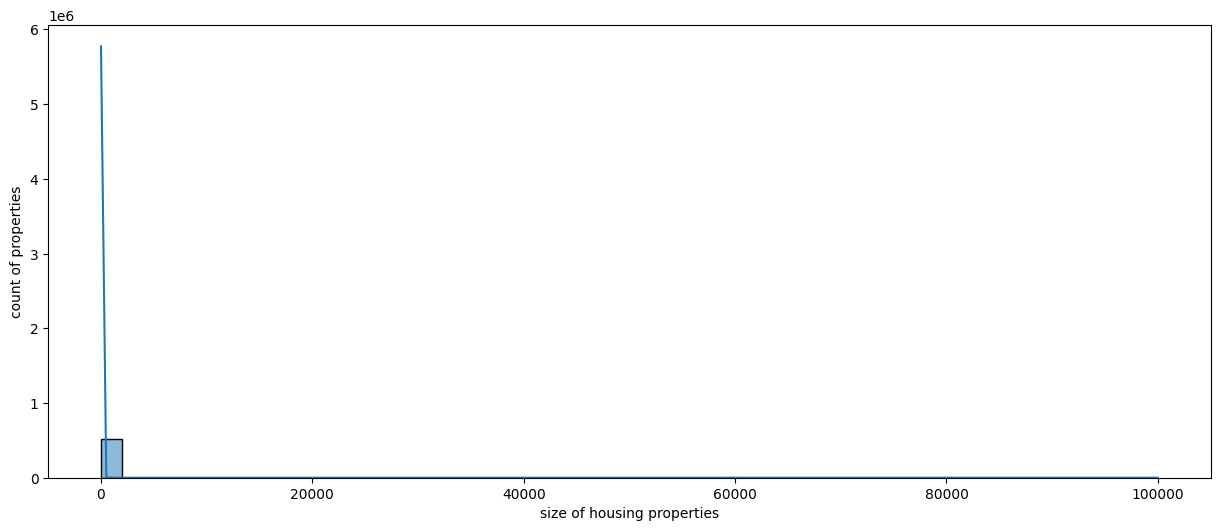

In [ ]:
plt.figure(figsize=(15,6), dpi = 100)
sns.histplot(data=df['acre_lot'], kde = True, bins = 50)
plt.savefig('acre_lot.png')
plt.ylabel('count of properties')
plt.xlabel('size of housing properties')

print('Skewness of size of properties in acre:', df['acre_lot'].skew())

Skewness of bathroom: 33.00366167059277


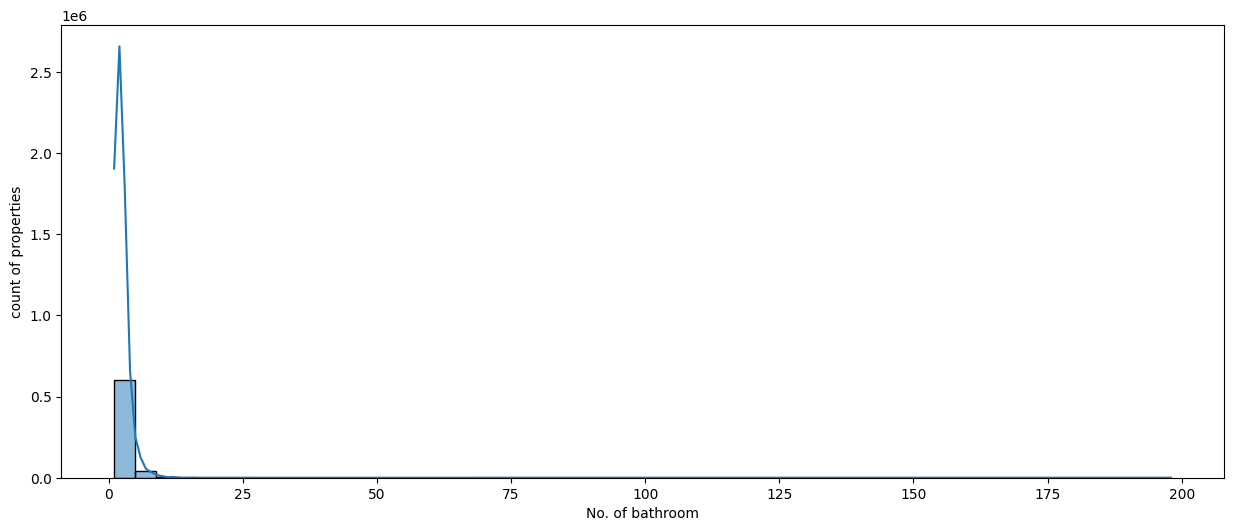

In [ ]:
plt.figure(figsize=(15,6), dpi = 100)
sns.histplot(data=df['bath'], kde = True, bins = 50 )
plt.savefig('bath.png')
plt.ylabel('count of properties')
plt.xlabel('No. of bathroom')

print('Skewness of bathroom:', df['bath'].skew())

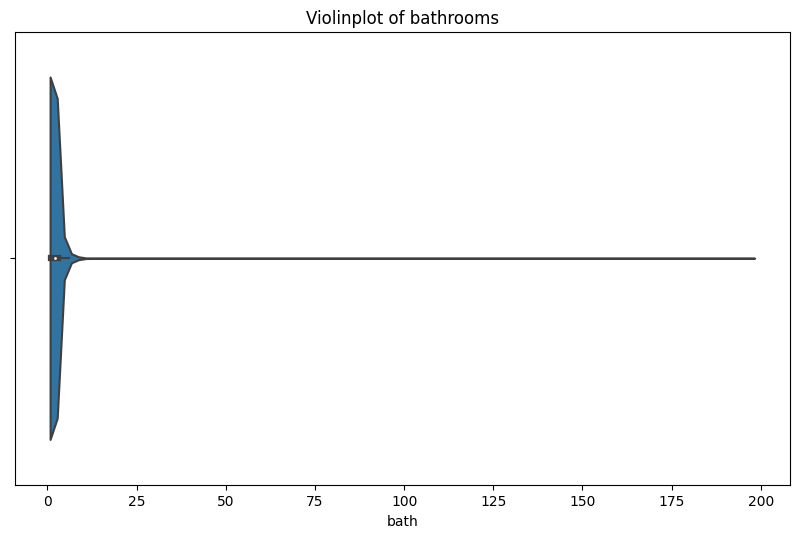

In [ ]:
plt.figure(figsize=(10,6), dpi = 100)
sns.violinplot(x='bath',data=df)
plt.title("Violinplot of bathrooms")
plt.savefig("Violinplon_bathrooms.png")
plt.show()

Skewness of bedroom: 9.312049013871519


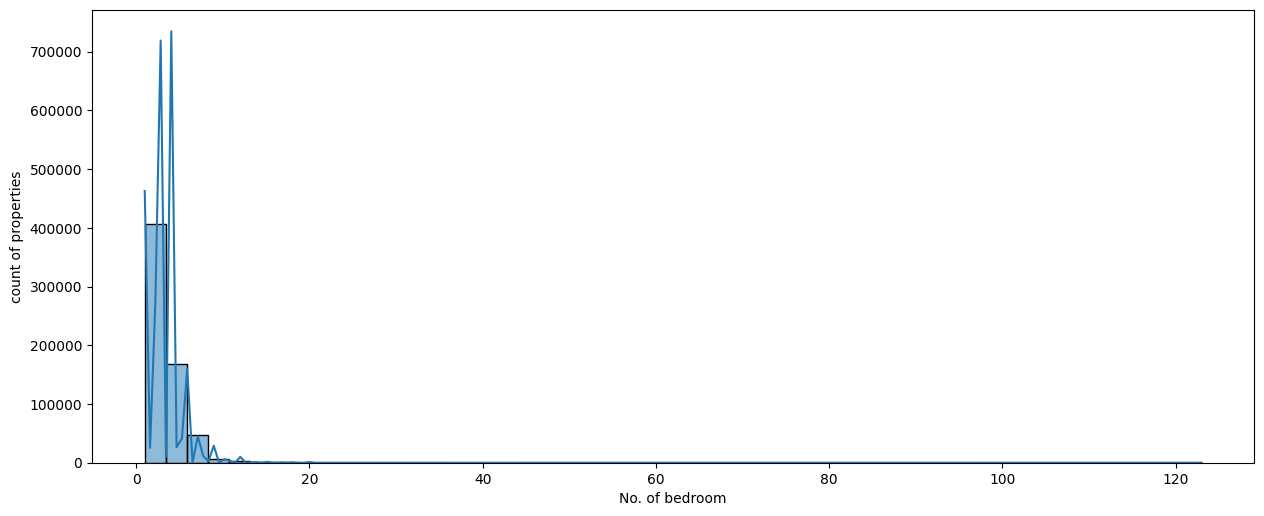

In [ ]:
plt.figure(figsize=(15,6), dpi = 100)
sns.histplot(data=df['bed'], kde = True, bins = 50 )
plt.savefig('bed.png')
plt.ylabel('count of properties')
plt.xlabel('No. of bedroom')

print('Skewness of bedroom:', df['bed'].skew())

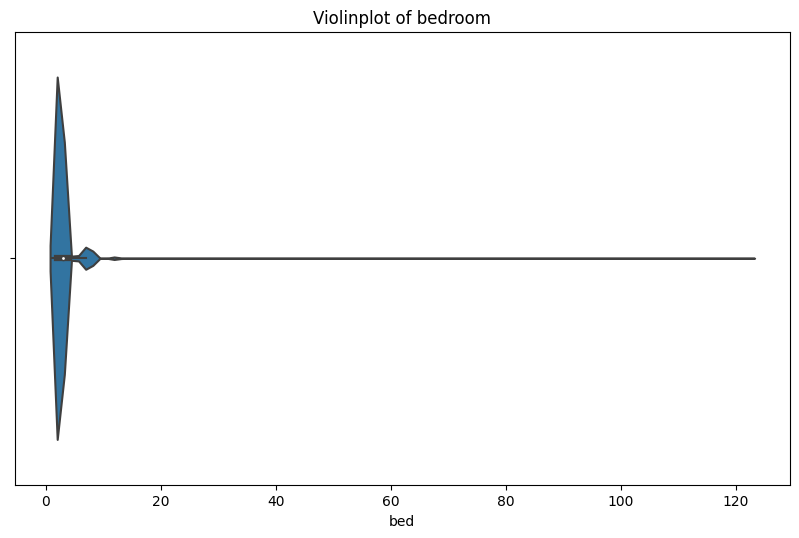

In [ ]:

plt.figure(figsize=(10,6), dpi = 100)
sns.violinplot(x='bed',data=df)
plt.title("Violinplot of bedroom")
plt.savefig("Violinplon_bedrooms.png")
plt.show()

Skewness of price: 172.15003565319608


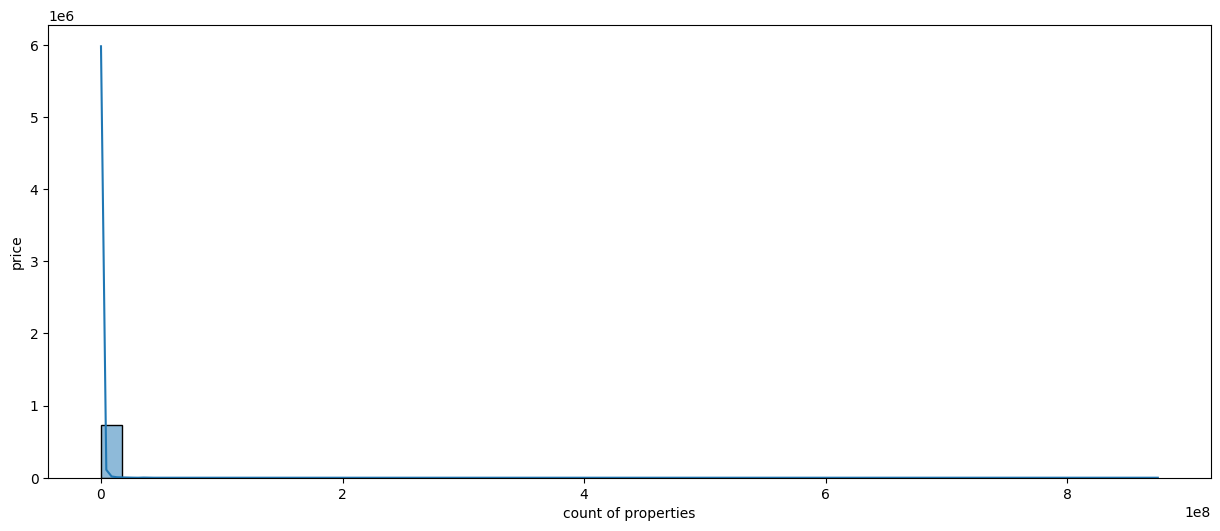

In [ ]:
plt.figure(figsize=(15,6), dpi = 100)
sns.histplot(data=df['price'], kde = True, bins = 50 )
plt.savefig('hist_price.png')
plt.xlabel('count of properties')
plt.ylabel('price')

print('Skewness of price:', df['price'].skew())

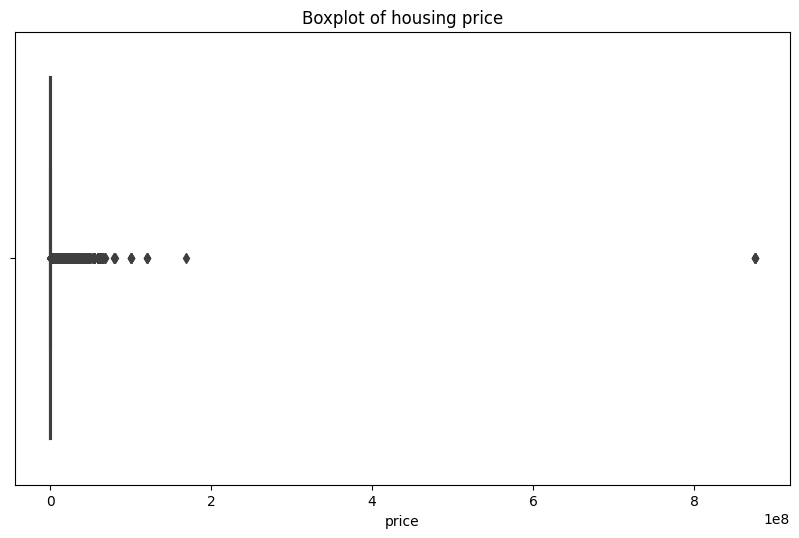

In [ ]:
plt.figure(figsize=(10,6), dpi = 100)
sns.boxplot(x= 'price',data=df)
plt.title("Boxplot of housing price")
plt.savefig('boxplot_price.png')

plt.show()

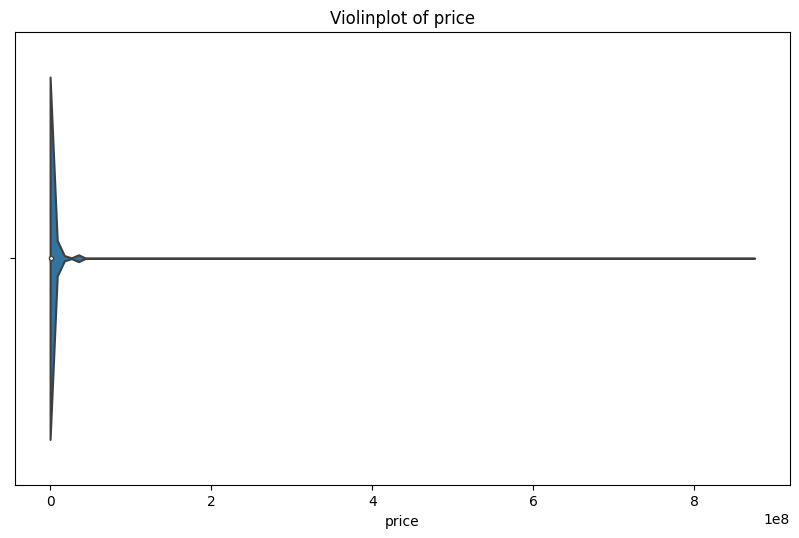

In [ ]:
plt.figure(figsize=(10,6), dpi = 100)
sns.violinplot(x='price',data=df)
plt.title("Violinplot of price")
plt.savefig("Violinplon_price.png")
plt.show()

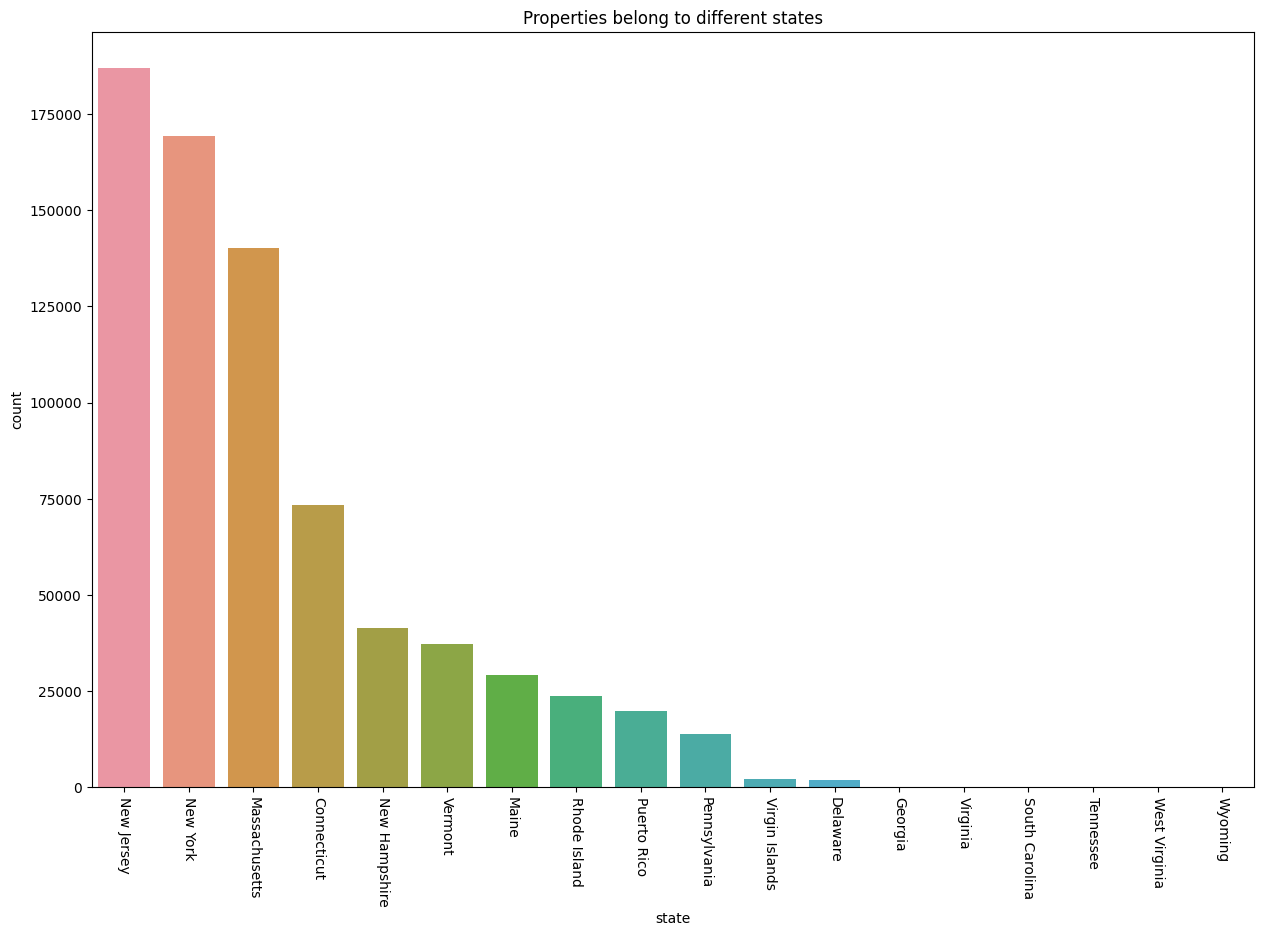

In [ ]:
plt.figure(figsize=(15,10), dpi = 100)
ax = sns.countplot(x="state",data=df,
              order = df["state"].value_counts().index)
plt.title("Properties belong to different states")
plt.xticks(rotation=270)
plt.savefig('states.png')
plt.show()

In [ ]:
print('Number of cities in which housing properties avaliable for sale:', len(df['city'].value_counts()))
print("city wise number of properties avaliable for sale: \n", df['city'].value_counts())

Number of cities in which housing properties avaliable for sale: 2527
city wise number of properties avaliable for sale: 
 New York City    39108
New York         37771
Boston           25288
Brooklyn         18470
Bronx             9341
                 ...  
Byron                1
Pond Eddy            1
Black Brook          1
Lincoln Plt          1
Erwinna              1
Name: city, Length: 2527, dtype: int64


In [ ]:
print(df['street'].value_counts())
print('_'*80)
print(df['full_address'].value_counts())

4 Glen Ellen Blvd    167
2 Barnes Blvd        125
Pr                   112
Main St              103
154 E 71st St        100
                    ... 
Curtis St Lot 78       1
59 New Forge Rd        1
325 Hanby Cir          1
35 Regency Ct          1
4717 Bleigh Ave        1
Name: street, Length: 105749, dtype: int64
________________________________________________________________________________
4 Glen Ellen Blvd, Millis, MA, 02054              167
2 Barnes Blvd, Hudson, MA, 01749                  125
Menantico Rd, Vineland, NJ, 08361                  99
709 8th St, Union City, NJ, 07087                  96
Piermont Heights Rd, Piermont, NH, 03779           93
                                                 ... 
6299 Broadway Apt C4, Bronx, NY, 10471              1
394 Penfield Rd, Fairfield, CT, 06824               1
105 W Hillendale Rd, Kennett Square, PA, 19348      1
400 Stewart Ave, Garden City, NY, 11530             1
4717 Bleigh Ave, Philadelphia, PA, 19136            1
Name: f

full_address and street columns having nearly all values unique no pattern is visible, encoding these values won't be fruitfull and may be decrease the performance of ML model. Hence we can dropped this column.

In [ ]:
columns_to_dropped = ['full_address', 'street', "city", "zip_code"]

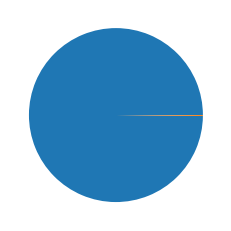

In [ ]:

status = df['status'].value_counts()
mylabels = ["For sale"]
plt.pie(status)
plt.savefig('house_status.png')
plt.show() 

status column have only one type of info. i.e. for sale. It's wont impact on prediction of house pricing. Hence, we can dropped this column.

In [ ]:
columns_to_dropped = ['full_address', 'street', "city", 'status', 'zip_code']

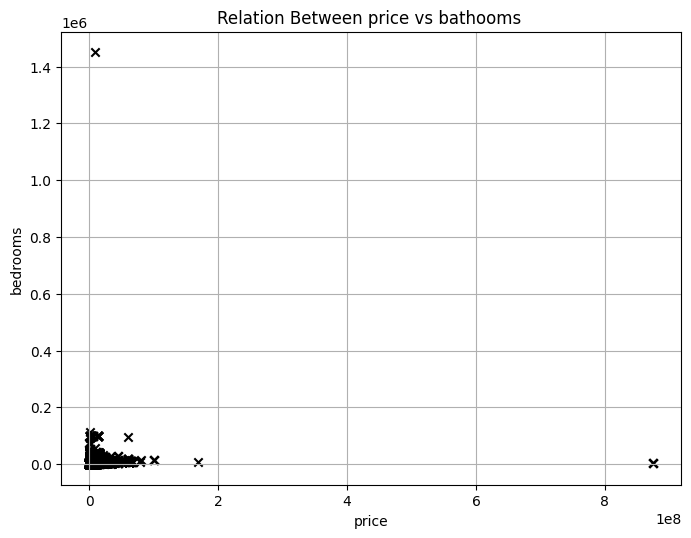

In [ ]:
plt.figure(figsize=(18, 6), dpi = 100)
plt.title("Relation Between price vs bathooms ")

plt.grid()
plt.scatter(df['price'] , df['house_size'], c='k', marker='x')
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.show()

from above plot, outliers lies beyond price > 1.5 X 10*8 and 2 bathrooms.

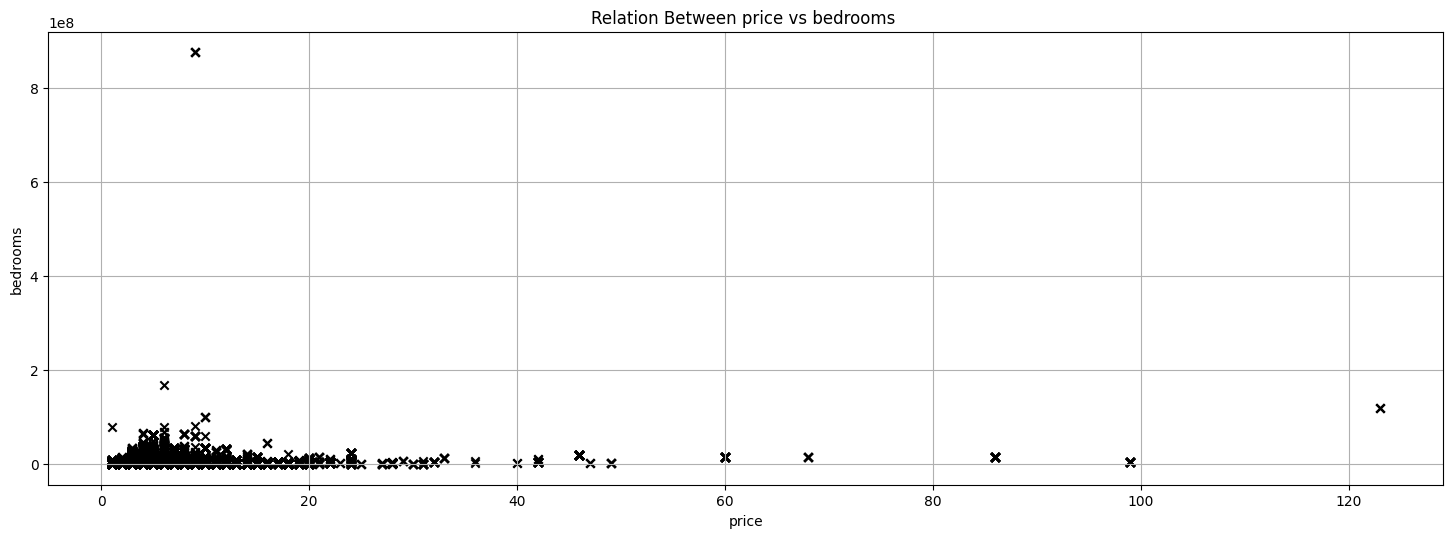

In [ ]:
plt.figure(figsize=(18, 6), dpi = 100)
plt.title("Relation Between price vs bedrooms ")

plt.grid()
plt.scatter(df['bed'] , df['price'], c='k', marker='x')
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.savefig('Price_bedrooms.png')
plt.show()

from above plot, outliers lies beyond price  40 X 10*8 and 2 bathrooms.

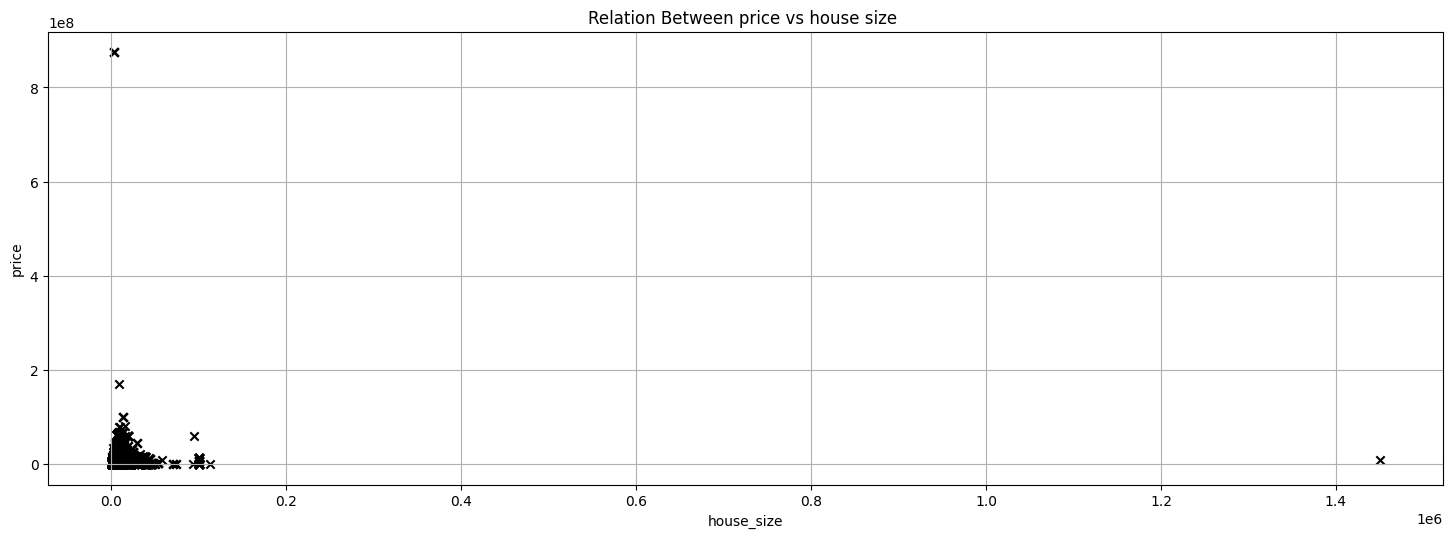

In [ ]:
plt.figure(figsize=(18, 6), dpi = 100)
plt.title("Relation Between price vs house size ")

plt.grid()
plt.scatter(df['house_size'] , df['price'], c='k', marker='x')
plt.ylabel("price")
plt.xlabel("house_size")
plt.savefig('Price_house_size.png')
plt.show()

ouliers lies beyond 14,00,000 (price) and 5000 (house size)